In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data1 = np.load('./data_for_xi_calculation/dX_data_t=27_to_t=30_grid_64_c=1by64_decor_t_16min.npz')
data2 = np.load('./data_for_xi_calculation/dX_data_t=30_to_t=33_grid_64_c=1by64_decor_t_16min.npz')
data3 = np.load('./data_for_xi_calculation/dX_data_t=33_to_t=36_grid_64_c=1by64_decor_t_16min.npz')
data4 = np.load('./data_for_xi_calculation/dX_data_t=36_to_t=39_grid_64_c=1by64_decor_t_16min.npz')
data5 = np.load('./data_for_xi_calculation/dX_data_t=39_to_t=42_grid_64_c=1by64_decor_t_16min.npz')
data6 = np.load('./data_for_xi_calculation/dX_data_t=42_to_t=45_grid_64_c=1by64_decor_t_16min.npz')

In [3]:
data1.files

['dX_x', 'dX_y']

In [4]:
dX1 = np.concatenate((data1['dX_x'], data2['dX_x'], data3['dX_x'], data4['dX_x'], data5['dX_x'], data6['dX_x']), axis=0)
dX2 = np.concatenate((data1['dX_y'], data2['dX_y'], data3['dX_y'], data4['dX_y'], data5['dX_y'], data6['dX_y']), axis=0)

In [5]:
dX1.shape, dX2.shape

((901, 29120), (901, 29120))

In [6]:
dX = np.concatenate((dX1, dX2), axis=1)
dX.shape

(901, 58240)

In [7]:
m = dX.shape[0]
print(m)

901


In [8]:
from numpy import linalg as LA
from scipy import signal

In [9]:
Dt_c = 0.02
scaled_dX = dX/np.sqrt(Dt_c)

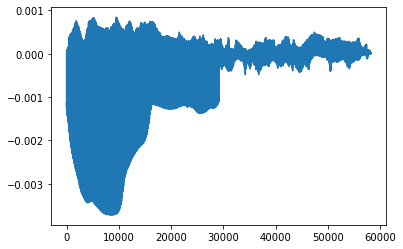

In [10]:
plt.plot(np.mean(scaled_dX, axis=0))

In [11]:
F = signal.detrend(scaled_dX, axis=0, type='constant')
F.shape

(901, 58240)

In [12]:
A, b, CT = LA.svd(F, full_matrices=False)

Text(0, 0.5, 'Eigenvalue, $\\lambda_i$')

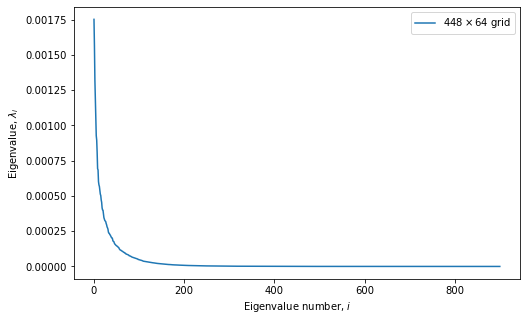

In [13]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(b**2/(m-1), label=r'$448 \times 64$ grid')
ax.legend()
ax.set_xlabel(r"Eigenvalue number, $i$")
ax.set_ylabel(r"Eigenvalue, $\lambda_i$")
# plt.savefig("./plots/eigenvalue_grid_64_t27_to_t45_decor_t_16min.png", dpi=300)

In [14]:
b**2/(m-1)

array([1.75279206e-03, 1.56500358e-03, 1.32111137e-03, 1.19394049e-03,
       1.09382210e-03, 9.27670196e-04, 8.96588579e-04, 8.09013984e-04,
       6.93903931e-04, 6.84731465e-04, 6.01079513e-04, 5.78384097e-04,
       5.67029024e-04, 5.40791234e-04, 5.13144147e-04, 5.03193793e-04,
       4.71773377e-04, 4.55031122e-04, 4.15258015e-04, 4.00690375e-04,
       3.98593405e-04, 3.69029467e-04, 3.46310241e-04, 3.36283065e-04,
       3.25841409e-04, 3.21962071e-04, 3.18012085e-04, 3.04353820e-04,
       2.95104675e-04, 2.80479388e-04, 2.73836937e-04, 2.64003528e-04,
       2.43144282e-04, 2.36150690e-04, 2.34679274e-04, 2.26180464e-04,
       2.23094523e-04, 2.16946868e-04, 2.09972689e-04, 2.03462521e-04,
       2.03013839e-04, 1.96447420e-04, 1.80793238e-04, 1.78324565e-04,
       1.76119597e-04, 1.66408584e-04, 1.59885213e-04, 1.55927264e-04,
       1.51182409e-04, 1.49162439e-04, 1.46128273e-04, 1.44036635e-04,
       1.42534146e-04, 1.38269954e-04, 1.36168018e-04, 1.33151106e-04,
      

In [15]:
B = np.diag(b)

In [16]:
B = np.diag(b/np.sqrt(m-1))
B.shape, CT.shape

((901, 901), (901, 58240))

In [17]:
BCT = np.matmul(B, CT)

In [18]:
var_vec = b**2/(m-1)

In [22]:
n_eigval = 94

p1 = 100*np.sum(var_vec[:n_eigval])/(np.sum(var_vec))

print(f'Total vairance captured by first {n_eigval} eigenvalues: {p1}')


Total vairance captured by first 94 eigenvalues: 90.01362513516713


In [23]:
n_eigval = 39

p1 = 100*np.sum(var_vec[:n_eigval])/(np.sum(var_vec))

print(f'Total vairance captured by first {n_eigval} eigenvalues: {p1}')

Total vairance captured by first 39 eigenvalues: 70.24842922632416


In [24]:
n_eigval = 18

p1 = 100*np.sum(var_vec[:n_eigval])/(np.sum(var_vec))

print(f'Total vairance captured by first {n_eigval} eigenvalues: {p1}')

Total vairance captured by first 18 eigenvalues: 49.773559064583864


In [25]:
BCT.shape, BCT

((901, 58240),
 array([[ 8.68666574e-04,  8.91479143e-04,  4.74346030e-04, ...,
         -5.39669375e-06,  5.27306416e-19,  4.35617721e-19],
        [ 2.79239165e-04,  2.50352910e-04,  1.46003929e-04, ...,
         -9.98922646e-06,  4.23411496e-20,  7.58951632e-20],
        [ 4.12497125e-05,  4.58400976e-05,  4.00361953e-04, ...,
         -2.26676734e-05, -5.52828684e-19, -5.13164201e-19],
        ...,
        [-1.72070250e-07, -1.76461458e-07, -1.76143391e-07, ...,
         -1.26227301e-07, -1.11952343e-21, -1.09391199e-21],
        [ 6.42300220e-08,  1.85751279e-07,  7.08843996e-08, ...,
          1.69745053e-08,  2.24295360e-22,  2.74897815e-22],
        [-4.32310145e-19,  6.11781043e-19,  1.31639789e-18, ...,
          1.01882399e-20, -2.99376659e-34, -9.74619340e-34]]))

In [26]:
CT.shape

(901, 58240)

In [27]:
combined_vec = BCT
detached_vec = np.zeros((combined_vec.shape[0],int(combined_vec.shape[1]/2),2))
for i in range(combined_vec.shape[0]):
    detached_vec[i,:,0] = combined_vec[i,:int(combined_vec.shape[1]/2)]
    detached_vec[i,:,1] = combined_vec[i,int(combined_vec.shape[1]/2):]
    
combined_vec.shape, detached_vec.shape

((901, 58240), (901, 29120, 2))

([<matplotlib.lines.Line2D at 0x7e7138bc2cb0>],
 [<matplotlib.lines.Line2D at 0x7e7138fc3ee0>])

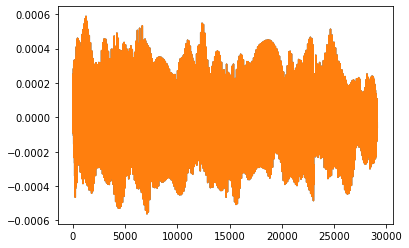

In [28]:
plt.plot(combined_vec[10,:29120]), plt.plot(detached_vec[10,:,0])

([<matplotlib.lines.Line2D at 0x7e7138b77910>],
 [<matplotlib.lines.Line2D at 0x7e713831e980>])

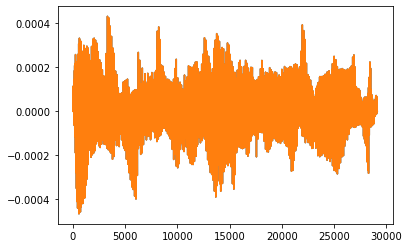

In [29]:
plt.plot(combined_vec[10,29120:]), plt.plot(detached_vec[10,:,1])

In [30]:
xi_mat = detached_vec

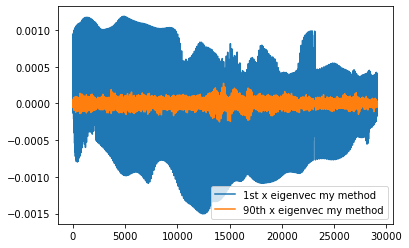

In [31]:
plt.plot(xi_mat[0,:,0], label='1st x eigenvec my method'), plt.plot(xi_mat[89,:,0], label='90th x eigenvec my method')
plt.legend()

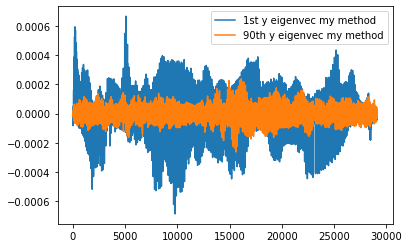

In [32]:
plt.plot(xi_mat[0,:,1], label='1st y eigenvec my method'), plt.plot(xi_mat[89,:,1], label='90th y eigenvec my method')
plt.legend()

In [33]:
eig_vec = xi_mat[:94,:,:]
eig_vec.shape

(94, 29120, 2)

In [34]:
eig_vec[0,:].shape

(29120, 2)

In [35]:
data_file = './xi_vec_data/xi_matrix_combined_calc_94_eigvec_c_1_by_64_decor_t_16min_t=27_to_t=45.npz'

np.savez(data_file, xi_mat = eig_vec)